In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

In [4]:
df['MMR_factor'] = ( df['MMRAcquisitionAuctionAveragePrice'] + df['MMRAcquisitonRetailCleanPrice'] + df['MMRCurrentAuctionCleanPrice'] + df['MMRCurrentRetailAveragePrice']) / 4

In [86]:
#BINNING NUMERICAL VALUES
df['VehBCost_bin'] = pd.cut(df.VehBCost.astype(int), 10, right = False)
df['VehOdo_bin'] = pd.cut(df.VehOdo.astype(int), 10, right = False)
df['MMR_factor_bin'] = pd.cut(df.MMR_factor.astype(int), 10, right = False)
df['WarrantyCost_bin'] = pd.cut(df.WarrantyCost.astype(int), 10, right = False)

In [244]:
#SELECT THE COLUMNS I AM INTERESTED IN
df_new = df[['Auction','VehicleAge','Make','Model','Trim','Color','Transmission','WheelType','Nationality','Size',
            'TopThreeAmericanName','VNST','VehBCost_bin', 'VehOdo_bin', 'MMR_factor_bin', 'WarrantyCost_bin']]

In [344]:
df_new.dropna(subset = ['Transmission','Color','Nationality','Size','TopThreeAmericanName'], inplace=True)

C:\Users\bonin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [345]:
df_new.Trim.fillna('Bas', inplace = True, limit=801)

In [346]:
df_new.Trim.fillna('LS', inplace = True, limit=580)

In [347]:
df_new.Trim.fillna('SE', inplace = True, limit=530)

In [348]:
df_new.WheelType.fillna('Alloy', inplace = True, limit=1377)

In [349]:
df_new.WheelType.fillna('Covers', inplace = True, limit=1200)

In [350]:
df_new.Color.isnull().sum()
df_new.Transmission.isnull().sum()
df_new.Nationality.isnull().sum()
df_new.Size.isnull().sum()
df_new.TopThreeAmericanName.isnull().sum()
df_new.Trim.isnull().sum()
df_new.WheelType.isnull().sum()

0

In [351]:
#WHY COLOR,TRANSMISSION,NATIONALITY,SIZE AND TOPTHREEAMERICAN HERE HAVE MISSING VALUES AND ABOVE NOT?????????????
df_new.isnull().sum()

Auction                 0
VehicleAge              0
Make                    0
Model                   0
Trim                    0
Color                   0
Transmission            0
WheelType               0
Nationality             0
Size                    0
TopThreeAmericanName    0
VNST                    0
VehBCost_bin            0
VehOdo_bin              0
MMR_factor_bin          0
WarrantyCost_bin        0
dtype: int64

In [359]:
dt = df_new.groupby('Nationality')['Size'].apply(list)
dt.head()

Nationality
AMERICAN          [MEDIUM, MEDIUM, VAN, VAN, MEDIUM, MEDIUM, MED...
OTHER             [SPECIALTY, COMPACT, SPECIALTY, MEDIUM, COMPAC...
OTHER ASIAN       [MEDIUM, MEDIUM, MEDIUM, MEDIUM, MEDIUM SUV, C...
TOP LINE ASIAN    [MEDIUM, MEDIUM, MEDIUM, MEDIUM, LARGE TRUCK, ...
Name: Size, dtype: object

In [360]:
baskets = dt.values

In [361]:
from fim import apriori

In [362]:
itemsets = apriori(baskets, supp=25, zmin=2, target='a') 

In [363]:
print('Number of itemsets:', len(itemsets))

Number of itemsets: 4079


In [364]:
rules = apriori(baskets, supp=25, zmin=2, target='r', conf=80, 
                report='YXlC') 

In [365]:
print('Number of rule:', len(rules))

Number of rule: 20364


In [285]:
#EXEMPLE RULES (RULES WITH INDEX 0 - FIRST RULES)
rules[0]

(Interval(3649.4, 7297.8, closed='left'),
 (Interval(14594.6, 18243.0, closed='left'),
  Interval(7297.8, 10946.2, closed='left'),
  Interval(10946.2, 14594.6, closed='left')),
 100.0,
 30.0,
 1.0,
 100.0)

In [272]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>1.9:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(make)[vehodo_bin 10]
# support: 25% confidence: 80%
# total rules: 2906
# lift > 1.1: 1696
# lift > 1.2: 1280
# lift > 1.3: 608
# lift > 1.4: 128
# lift > 1.5: 608
# lift > 1.6: 384
# lift > 1.7: 128
# .
# lift > 1.9: 128

0 -- (Interval(21891.4, 25539.8, closed='left'), (Interval(29188.2, 32836.6, closed='left'), Interval(18243.0, 21891.4, closed='left'), Interval(32836.6, 36521.484, closed='left'), Interval(25539.8, 29188.2, closed='left'), Interval(14594.6, 18243.0, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(10946.2, 14594.6, closed='left'), Interval(3649.4, 7297.8, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
1 -- (Interval(14594.6, 18243.0, closed='left'), (Interval(29188.2, 32836.6, closed='left'), Interval(18243.0, 21891.4, closed='left'), Interval(32836.6, 36521.484, closed='left'), Interval(25539.8, 29188.2, closed='left'), Interval(21891.4, 25539.8, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(10946.2, 14594.6, closed='left'), Interval(3649.4, 7297.8, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
2 -- (Interval(25539.8, 29188.2, clo

831 -- (Interval(29188.2, 32836.6, closed='left'), (Interval(18243.0, 21891.4, closed='left'), Interval(25539.8, 29188.2, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
832 -- (Interval(21891.4, 25539.8, closed='left'), (Interval(29188.2, 32836.6, closed='left'), Interval(18243.0, 21891.4, closed='left'), Interval(14594.6, 18243.0, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(10946.2, 14594.6, closed='left'), Interval(3649.4, 7297.8, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
833 -- (Interval(14594.6, 18243.0, closed='left'), (Interval(29188.2, 32836.6, closed='left'), Interval(18243.0, 21891.4, closed='left'), Interval(21891.4, 25539.8, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(10946.2, 14594.6, closed='left'), Interval(3649.4, 7297.8, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
834 -- (Interval(18

1831 -- (Interval(21891.4, 25539.8, closed='left'), (Interval(18243.0, 21891.4, closed='left'), Interval(32836.6, 36521.484, closed='left'), Interval(25539.8, 29188.2, closed='left'), Interval(14594.6, 18243.0, closed='left'), Interval(1.0, 3649.4, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
1832 -- (Interval(14594.6, 18243.0, closed='left'), (Interval(18243.0, 21891.4, closed='left'), Interval(32836.6, 36521.484, closed='left'), Interval(25539.8, 29188.2, closed='left'), Interval(21891.4, 25539.8, closed='left'), Interval(1.0, 3649.4, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
1833 -- (Interval(25539.8, 29188.2, closed='left'), (Interval(18243.0, 21891.4, closed='left'), Interval(32836.6, 36521.484, closed='left'), Interval(14594.6, 18243.0, closed='left'), Interval(21891.4, 25539.8, closed='left'), Interval(1.0, 3649.4, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
1834 -- (Interval(32836.6, 36521.484, closed='left')

2830 -- (Interval(21891.4, 25539.8, closed='left'), (Interval(32836.6, 36521.484, closed='left'),), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
2831 -- (Interval(32836.6, 36521.484, closed='left'), (Interval(21891.4, 25539.8, closed='left'),), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
2832 -- (Interval(21891.4, 25539.8, closed='left'), (Interval(25539.8, 29188.2, closed='left'), Interval(14594.6, 18243.0, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(10946.2, 14594.6, closed='left'), Interval(3649.4, 7297.8, closed='left')), 33.33333333333333, 33.33333333333333, 3.0, 100.0)
2833 -- (Interval(14594.6, 18243.0, closed='left'), (Interval(25539.8, 29188.2, closed='left'), Interval(21891.4, 25539.8, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(10946.2, 14594.6, closed='left'), Interval(3649.4, 7297.8, closed='left')), 33.33333333333333, 33.33333333333333, 3.0,

In [181]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>1.1:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(make)[vehbcost_bin 10]
# support: 25% confidence: 80%
# total rules: 10
# lift > 1.1: 1
# lift > 1.2: 0

Rules with high lift: 0


In [124]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>3:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(auction)[vehbcost_bin 10]
# support: 25% confidence: 80%
# total rules: 2096
# lift > 1.1: 736
# .
# lift > 1.4: 736
# lift > 1.5: 320
# .
# lift > 2.9: 320

Rules with high lift: 0


In [317]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>3.9:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(Nationality)[vehbcost_bin 10]
# support: 25% confidence: 80%
# total rules: 1452
# lift > 3.9: 48 all 4.0.. nationaliy = 4 why?

0 -- (Interval(21891.4, 25539.8, closed='left'), (Interval(14594.6, 18243.0, closed='left'), Interval(18243.0, 21891.4, closed='left'), Interval(32836.6, 36521.484, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(10946.2, 14594.6, closed='left'), Interval(3649.4, 7297.8, closed='left')), 25.0, 25.0, 4.0, 100.0)
1 -- (Interval(21891.4, 25539.8, closed='left'), (Interval(14594.6, 18243.0, closed='left'), Interval(18243.0, 21891.4, closed='left'), Interval(32836.6, 36521.484, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(10946.2, 14594.6, closed='left')), 25.0, 25.0, 4.0, 100.0)
2 -- (Interval(21891.4, 25539.8, closed='left'), (Interval(14594.6, 18243.0, closed='left'), Interval(18243.0, 21891.4, closed='left'), Interval(32836.6, 36521.484, closed='left'), Interval(1.0, 3649.4, closed='left'), Interval(7297.8, 10946.2, closed='left'), Interval(3649.4, 7297.8, closed='left'))

In [ ]:
#code that filters all ARs with a certain lift 
count = 0
for r in rules:
    if r[4]>3.9:
        print('%s -- %s' % (str(count), r))
        count = count + 1
print('Rules with high lift: {}'.format(count))
# groupby(Nationality)[vehbcost_bin 10]
# support: 25% confidence: 80%
# total rules: 1452
# lift > 3.9: 48 all 4.0.. nationaliy = 4 why?

In [367]:

contare = 0
rules = apriori(baskets, supp=5, zmin=2, zmax = 5, target='r', conf=12, report='Cl') 
for i in rules:
    if i[0] == '1_IBB':
            print('%s -- %s' % (str(contare), i))
            contare = contare + 1

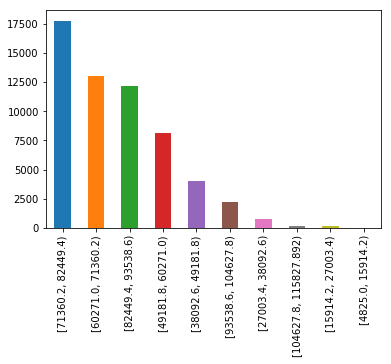

In [310]:
df_new.VehOdo_bin.value_counts().plot(kind='bar')

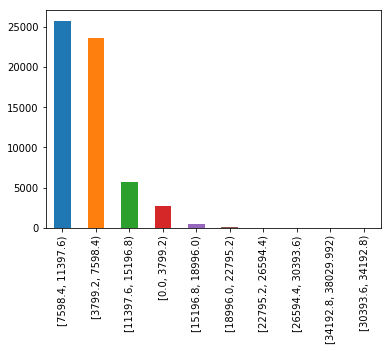

In [80]:
df_new.MMR_factor_bin.value_counts().plot(kind='bar') #10 bin selected

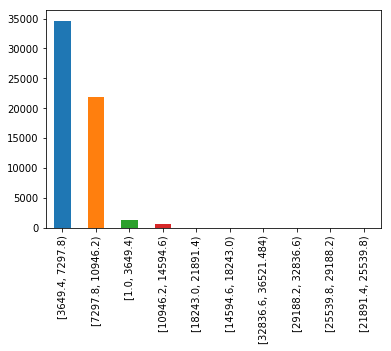

In [85]:
df_new.VehBCost_bin.value_counts().plot(kind='bar') #sturge 17 bin